# General Binning function

In [2]:
import pandas as pd 
import numpy as np 
from astropy import table
from scipy import stats
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit
import time
from scipy.interpolate import interp1d


start = time.time()


#This should be modified to be used with every template

##User inputs
#SN = np.loadtxt("sne/Ia/sn1989b.m07.dat")
#lams = SN[:,0]
#fluxs = SN[:,1]
##In angstroms
#resolution = 20
#

def bin_spectra(spectrum, resolution):
    
   
    number_of_bins = np.math.floor((lams[-1]-lams[0]) / resolution ) 
    flux_bin, bin_edge, index = scipy.stats.binned_statistic(lams, fluxs, statistic='mean', bins = number_of_bins)
    
    #Takes the mean of the edges of the bin in order to plot the binned spectrum
    bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]
    
    
    #Make a table with the     
    bin_spectra = table.Table()
    bin_spectra['lam_bin'] = bin_wavelength
    bin_spectra['bin_flux'] = flux_bin
    
    bin_wavelength = np.array(bin_wavelength)
    flux_bin   = np.array(flux_bin)
    flux_bin = flux_bin/(median(flux_bin))
    
    #print('the spectra is binned for a resolution of', resolution)
    #return bin_spectra
    
    #Interpolation
    #template_interp  = interpolate.interp1d(lam, flux_bin,  bounds_error=False, fill_value=np.nan)
    return bin_spectra

end = time.time()
print(end - start)

0.00020122528076171875


# Bins and combines SN + HG

In [3]:
import numpy as np 
from astropy import table
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from scipy import *


SN = np.loadtxt("sne/Ia/sn1989b.m05.dat")
lams = SN[:,0]
fluxs = SN[:,1]

#In angstroms
resolution = 20
#print('the spectra is binned for a resolution of', resolution)

number_of_bins = np.math.floor((lams[-1]-lams[0]) / resolution ) 
flux_bin_SN, bin_edge, index = scipy.stats.binned_statistic(lams, fluxs, statistic='mean', bins = number_of_bins)

#Takes the mean of the edges of the bin in order to plot the binned spectrum
bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]


#Make a table with the     
bin_spectra = table.Table()
bin_spectra['lam_bin_SN'] = bin_wavelength
bin_spectra['bin_flux_SN'] = flux_bin_SN

bin_wavelength = np.array(bin_wavelength)
flux_bin_SN   = np.array(flux_bin_SN)

   
#print(bin_spectra)


GT = np.loadtxt("/Users/user/Desktop/ssf/gal/S0")
lamgt = GT[:,0]
fluxgt = GT[:,1]


number_of_binsHG = np.math.floor((lamgt[-1]-lamgt[0]) / resolution ) 
flux_bin_HG, bin_edge, index = scipy.stats.binned_statistic(lamgt, fluxgt, statistic='mean', bins = number_of_bins)
#
bin_wavelengthHG = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]

#print(bin_spectra_HG)
#
bin_spectra_HG = table.Table()
bin_spectra_HG['lam_bin_HG'] = bin_wavelengthHG
bin_spectra_HG['flux_bin_HG'] = flux_bin_HG

#print(flux_bin_HG)

bin_wavelengthHG = np.array(bin_wavelengthHG)

#print(bin_wavelengthHG)

flux_bin_HG    = np.array(flux_bin_HG)

#print(flux_bin_HG)
#Combining spectra

lam = bin_wavelength
#flux= flux_bin_SN + flux_bin_HG

#print(mean(flux_bin_HG))

/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


## Plot

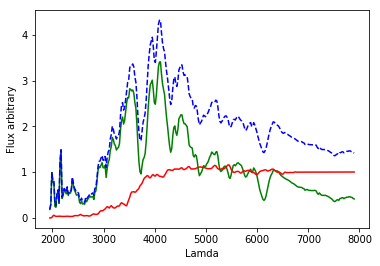

In [4]:
#Plot the data

# I am picking lam = 1 at the median
flux_bin_SN = flux_bin_SN/(median(flux_bin_SN))
flux_bin_HG = flux_bin_HG/(median(flux_bin_HG))

#print('HG:')
#print(flux_bin_HG)
##print(mean(flux_bin_SN))

flux = flux_bin_HG + flux_bin_SN

plt.plot(lam, flux_bin_SN,'g')
plt.plot(lam, flux_bin_HG, 'r')
plt.plot(lam, flux, 'b--')

plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.show()

#print(mean(flux_bin_SN))

#print(flux_bin_HG)

## Interpolate

In [5]:
SN_interp  = interpolate.interp1d(lam, flux_bin_SN,  bounds_error=False, fill_value=np.nan)
HG_interp = interpolate.interp1d(lam, flux_bin_HG,  bounds_error=False, fill_value=np.nan)

# Make into a file

In [6]:
#I need to fix this such that it'll save the lam with the spectra
np.savetxt("/Users/user/Desktop/ssf/superfit/fluxBINNEEDDD.dat",[lam,flux_bin_HG])
    

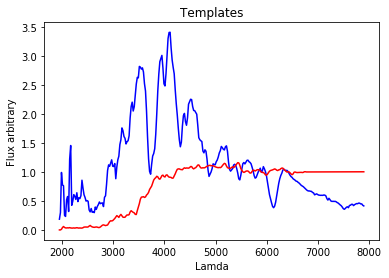

In [7]:
#fuck

plt.plot(lam, SN_interp(lam),'b')
plt.plot(lam, HG_interp(lam),'r')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Templates')
plt.show()

In [14]:
#Reading Spectra
import glob


templates_gal = glob.glob('gal/**/*')
templates_gal = [x for x in templates_gal if 'CVS' not in x and 'README' not in x]
templates_gal = np.array(templates_gal)

templates_sn = glob.glob('sne/**/*')
templates_sn = [x for x in templates_sn if 'CVS' not in x and 'README' not in x]
templates_sn = np.array(templates_sn)

print(templates_sn)

['sne/II/sn2005db.p86.dat' 'sne/II/sn1997cy.u31.dat'
 'sne/II/sn2005cs.p14.dat' 'sne/II/sn1987a.m84.dat'
 'sne/II/sn2004et.p47.dat' 'sne/II/sn2005cs.p01.dat'
 'sne/II/sn2008ax.p35.dat' 'sne/II/sn1986I.p50.dat'
 'sne/II/sn2004et.p45.dat' 'sne/II/sn1999em.p15.dat'
 'sne/II/sn2005cs.p02.dat' 'sne/II/sn2005cp.u201.dat'
 'sne/II/sn2005cs.p33.dat~' 'sne/II/theory99em.p15.dat'
 'sne/II/theory99em.45.dat' 'sne/II/theory99em.p05.dat'
 'sne/II/sn1980K.p41.dat' 'sne/II/sn2005cs.p06.dat'
 'sne/II/sn1993j.p60.dat' 'sne/II/sn1979C.p43.dat'
 'sne/II/sn1993W.p99.dat' 'sne/II/sn1999em.p04.dat'
 'sne/II/sn2005cl.p70.dat' 'sne/II/sn1986I.p83.dat'
 'sne/II/theory99em.p10.dat' 'sne/II/sn2005db.p40.dat'
 'sne/II/sn2004et.p323.dat' 'sne/II/sn2005cs.p05.dat'
 'sne/II/sn2005cs.p11.dat' 'sne/II/sn1987a.max.dat'
 'sne/II/sn2004et.p95.dat' 'sne/II/sn2005bx.p11.dat'
 'sne/II/sn1988A.p03.dat' 'sne/II/sn1999em.p75.dat'
 'sne/II/sn1986I.p19.dat' 'sne/II/sn2005cl.p15.dat'
 'sne/II/sn1987a.p113.dat' 'sne/II/sn2004et.p3

In [15]:
from astropy import table
import astropy
import numpy as np

resolution = 20
for i in templates_sn:
    
    SN = np.loadtxt(i)
    lams = SN[:,0]
    fluxs = SN[:,1]
    bin_spectra(SN,20)
#for template in templates_sn:    
    
#np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/sn_name.dat",[lam,flux_bin_HG])    

TypeError: 'Table' object is not callable